In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Data Science\Datasets\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
df.drop(['Name','Cabin','PassengerId','SibSp','Parch','Ticket','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


One Hot Encoding to convert gender column to binary

In [162]:
dummies = pd.get_dummies(df.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [163]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,False,True
1,1,1,female,38.0,71.2833,True,False
2,1,3,female,26.0,7.9250,True,False
3,1,1,female,35.0,53.1000,True,False
4,0,3,male,35.0,8.0500,False,True


In [164]:
df['female'] = df['female'].astype(int)
df['male'] = df['male'].astype(int)
df.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1


Removal of outliers

In [165]:
df.describe()

,Survived,Pclass,Age,Fare,female,male
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.352413,0.647587
std,0.486592,0.836071,14.526497,49.693429,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


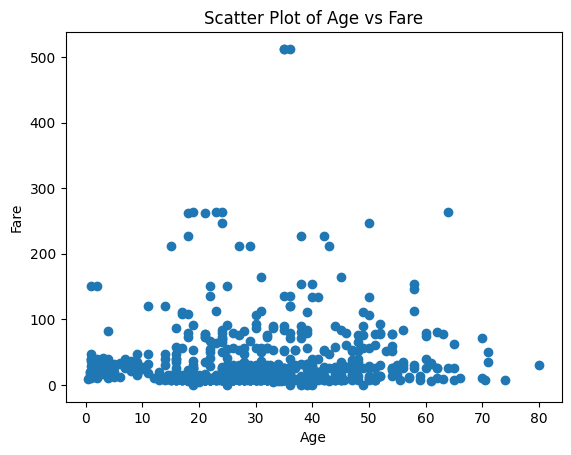

In [166]:
plt.scatter(df['Age'], df['Fare'])
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

In [167]:

df1 = df[df['Fare'] < 300]
# If you want to reset the index of df1
df1.reset_index(drop=True, inplace=True)
df1.describe()

,Survived,Pclass,Age,Fare,female,male
count,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,29.675345,30.582164,0.352477,0.647523
std,0.486091,0.834007,14.552495,41.176366,0.478011,0.478011
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,30.771850,1.000000,1.000000
max,1.000000,3.000000,80.000000,263.000000,1.000000,1.000000


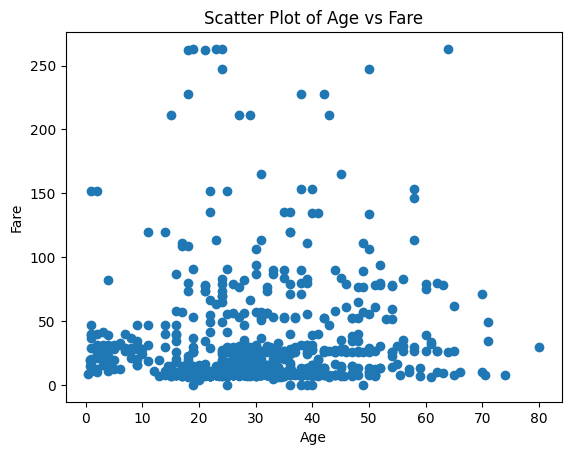

In [168]:
plt.scatter(df1['Age'], df1['Fare'])
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

Check NA (Missing Values)

In [169]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
female        0
male          0
dtype: int64

Handle Missing Values with Mean

In [170]:
df1.loc[:, 'Age'] = df1['Age'].fillna(df1['Age'].mean())
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
female      0
male        0
dtype: int64

In [171]:
df1 = df1.drop('Sex', axis='columns')
df1

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.000000,7.2500,0,1
1,1,1,38.000000,71.2833,1,0
2,1,3,26.000000,7.9250,1,0
3,1,1,35.000000,53.1000,1,0
4,0,3,35.000000,8.0500,0,1
...,...,...,...,...,...,...
883,0,2,27.000000,13.0000,0,1
884,1,1,19.000000,30.0000,1,0
885,0,3,29.675345,23.4500,1,0
886,1,1,26.000000,30.0000,0,1


Creating x and y

In [173]:
x = df1.drop('Survived', axis = 'columns')
y = df1.Survived
x

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
883,2,27.000000,13.0000,0,1
884,1,19.000000,30.0000,1,0
885,3,29.675345,23.4500,1,0
886,1,26.000000,30.0000,0,1


In [174]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = [GaussianNB(), LogisticRegression(), RandomForestClassifier()]
res = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model in models:
    cv_score = cross_val_score(model, x, y, cv=cv)
    res[str(model)] = np.average(cv_score) 

res   


{'GaussianNB()': 0.7797752808988764,
 'LogisticRegression()': 0.7853932584269664,
 'RandomForestClassifier()': 0.8078651685393259}

Splitting test and train Data

In [175]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Training Model using Random Forest Classifier

In [176]:
model = GaussianNB()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.8146067415730337

Predict

In [177]:
model.predict(x_test[:10])

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [178]:
y_test[:10]

135    0
242    0
237    1
186    1
874    0
113    0
871    1
730    0
234    0
417    0
Name: Survived, dtype: int64

In [179]:
model.predict_proba(x_test[:10])

array([[0.96842428, 0.03157572],
       [0.97107611, 0.02892389],
       [0.01722036, 0.98277964],
       [0.06727651, 0.93272349],
       [0.98552793, 0.01447207],
       [0.06047451, 0.93952549],
       [0.02768918, 0.97231082],
       [0.97113041, 0.02886959],
       [0.96939765, 0.03060235],
       [0.97106972, 0.02893028]])